In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# generating a sequence of iid random numbers
X_t_prev = np.random.normal(0, 1, 1000000)
X_t = np.random.normal(0, 1, 1000000)


# corr [X_t+1, X_t]
np.corrcoef(X_t, X_t_prev)[0, 1]

0.0005507979659405576

## correlation on differences $Corr(X_{t+1}-X_{t}, X_{t} - X_{t-1}) $ are biased

In [3]:
X_t_next = np.random.normal(0, 1, 1000000)

np.corrcoef(X_t - X_t_prev, X_t_next - X_t)[0, 1]

-0.49960603343069093

Text(0, 0.5, '$corr(X_t - X_{t-1}, X_{t+1} - X_t)$')

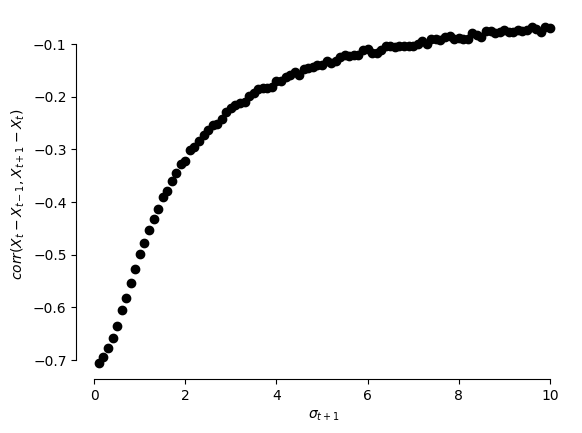

In [4]:
n_simulations = 100000
sigma_1 = 1
sigma_2 = np.linspace(0.1, 10, 100)
X_t_prev = np.random.normal(0, sigma_1, n_simulations)
X_t = np.random.normal(0, sigma_1, n_simulations)
for sigma in sigma_2:
    X_t_next = np.random.normal(0, sigma, n_simulations)
    corr = np.corrcoef(X_t - X_t_prev, X_t_next - X_t)[0, 1]
    plt.plot(sigma, corr, 'o', color='black')

sns.despine(trim=True)
plt.xlabel(r'$\sigma_{t+1}$')
plt.ylabel(r'$corr(X_t - X_{t-1}, X_{t+1} - X_t)$')


# high dimensional

### cov size doesn't effect correlation and cosine stds

In [5]:
# generating a sequence of iid random numbers
D = 10
X_t_prev = np.random.multivariate_normal(mean=np.zeros(D), cov=np.eye(D), size=10000)
X_t = np.random.multivariate_normal(mean=np.zeros(D), cov=np.eye(D) , size=10000)


# cos similarity of X_t and X_t_next
from scipy.spatial.distance import cosine
cosines = []
for i in range(X_t.shape[0]):
    cosines.append(1 - cosine(X_t[i], X_t_prev[i]))

print("cosine: ", np.mean(cosines))
print("cosine std: ", np.std(cosines))


# euclidean distance of X_t and X_t_next
from scipy.spatial.distance import cosine
distances = []
for i in range(X_t.shape[0]):
    distances.append(np.linalg.norm(X_t[i] - X_t_prev[i]))

print("euclidean distance: ", np.mean(distances))
print("euclidean distance std: ", np.std(distances))


# correlation X_t and X_t_next
corrs = []
for i in range(X_t.shape[0]):
    corrs.append(np.corrcoef(X_t[i], X_t_prev[i])[0, 1])
print("correlation: ", np.mean(corrs))
print("correlation std: ", np.std(corrs))
# print(np.mean(corrs))



cosine:  0.0002947280027571699
cosine std:  0.3172182618572007
euclidean distance:  4.351992890719581
euclidean distance std:  0.9957910466852837
correlation:  0.0011091114725067376
correlation std:  0.3343850827473345


In [6]:
X_t_next = np.random.multivariate_normal(mean=np.zeros(D), cov=np.eye(D) * 1, size=10000)

cosines = []
for i in range(X_t.shape[0]):
    cosines.append(1 - cosine(X_t[i] - X_t_prev[i], X_t_next[i] - X_t[i]))
print("cosine: ", np.mean(cosines))
print("cosine std: ", np.std(cosines))


corrs = []
for i in range(X_t.shape[0]):
    corrs.append(np.corrcoef(X_t[i] - X_t_prev[i], X_t_next[i] - X_t[i])[0, 1])
print("correlation: ", np.mean(corrs))
print("correlation std: ", np.std(corrs))

cosine:  -0.47988748277282967
cosine std:  0.2511104627242232
correlation:  -0.4776786465885424
correlation std:  0.2671265627469568


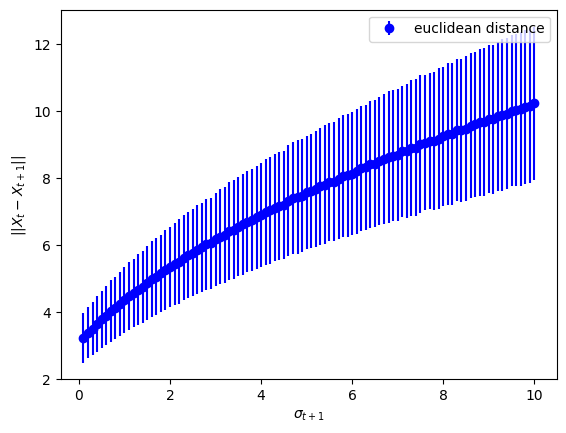

In [19]:
for sigma in np.linspace(0.1, 10, 100):
    X_t_next = np.random.multivariate_normal(mean=np.zeros(10), cov=np.eye(10) * sigma, size=10000)
    cosines = []
    corrs = []
    distances = []
    for i in range(X_t.shape[0]):
        distances.append(np.linalg.norm(X_t[i] - X_t_next[i]))
    # bar plot mean and std of distances
    plt.errorbar(sigma, np.mean(distances), yerr=np.std(distances), fmt='o', color='blue')
plt.xlabel(r'$\sigma_{t+1}$')
plt.ylabel(r'$||X_t - X_{t+1}||$')
plt.legend(['euclidean distance'])


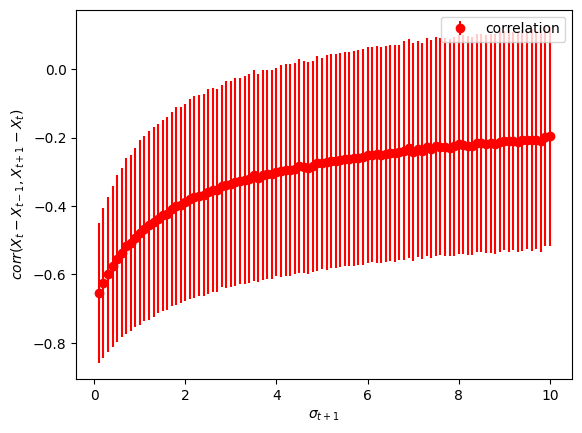

In [7]:
for sigma in np.linspace(0.1, 10, 100):
    X_t_next = np.random.multivariate_normal(mean=np.zeros(10), cov=np.eye(10) * sigma, size=10000)
    cosines = []
    corrs = []
    for i in range(X_t.shape[0]):
        corrs.append(np.corrcoef(X_t[i] - X_t_prev[i], X_t_next[i] - X_t[i])[0, 1])
    plt.errorbar(sigma, np.mean(corrs), yerr=np.std(corrs), fmt='o', color='red')

plt.xlabel(r'$\sigma_{t+1}$')
plt.ylabel(r'$corr(X_t - X_{t-1}, X_{t+1} - X_t)$')
plt.legend(['correlation'])

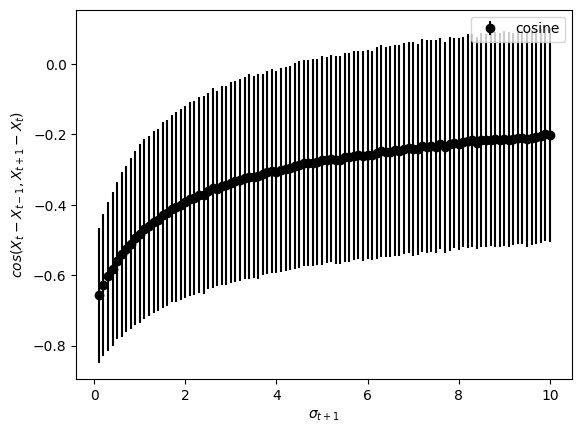

In [ ]:
for sigma in np.linspace(0.1, 10, 100):
    X_t_next = np.random.multivariate_normal(mean=np.zeros(10), cov=np.eye(10) * sigma, size=10000)
    cosines = []
    corrs = []
    for i in range(X_t.shape[0]):
        cosines.append(1 - cosine(X_t[i] - X_t_prev[i], X_t_next[i] - X_t[i]))
    plt.errorbar(sigma, np.mean(cosines), yerr=np.std(cosines), fmt='o', color='black')
plt.xlabel(r'$\sigma_{t+1}$')
plt.ylabel(r'$cos(X_t - X_{t-1}, X_{t+1} - X_t)$')
plt.legend(['cosine'])

### as trend is stronger, cosine stronger $ cos (X_t, X_{t+1})$, diff cosine weaker $ cos(X_t - X_{t-1}, X_{t+1} - X_t)$

In [40]:
# generate a sequence of first-order multi-variate autoregressive process
def generate_ar1_process(n, p, rho):
    """Generate a first-order multivariate autoregressive process."""
    X = np.zeros((n, p))
    for t in range(1, n):
        X[t] = rho * X[t - 1] + np.random.normal(0, 1, p)
    return X
# Generate a sample of the AR(1) process
n = 1000
p = 10
rho = 0.9
X_t = generate_ar1_process(n, p, rho)


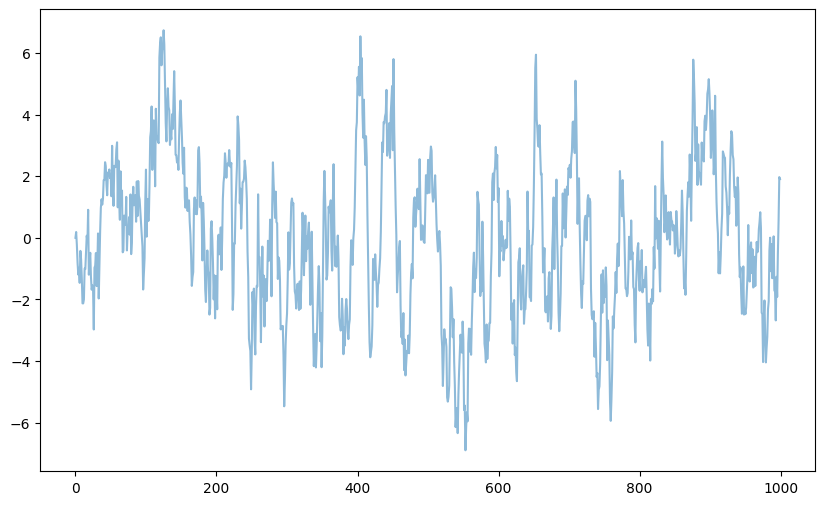

In [41]:
# plot the first two dimensions of the AR(1) process
plt.figure(figsize=(10, 6))
plt.plot(X_t[:, 0], alpha=0.5)

In [42]:
print(r'X_t and x_{t-1}')
cosines = []
for i in range(X_t.shape[0] - 1):
    cosines.append(1 - cosine(X_t[i], X_t[i + 1]))
print("cosine: ", np.mean(cosines))

distances = []
for i in range(X_t.shape[0] - 1):
    distances.append(np.linalg.norm(X_t[i] - X_t[i + 1]))
print("euclidean distance: ", np.mean(distances))

corrs = []
for i in range(X_t.shape[0] - 1):
    corrs.append(np.corrcoef(X_t[i], X_t[i + 1])[0, 1])
print("correlation: ", np.nanmean(corrs))

X_t and x_{t-1}
cosine:  0.8948030020335154
euclidean distance:  3.1840734043299634
correlation:  0.8905386150904719


/Users/amin/Library/Python/3.9/lib/python/site-packages/scipy/spatial/distance.py:647: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)
/Users/amin/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/amin/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [43]:
print(r"$ (X_t - X_{t-1}, X_{t+1} - X_t)$")

cosines = []
for i in range(X_t.shape[0] - 2):
    cosines.append(1 - cosine(X_t[i + 1] - X_t[i], X_t[i + 2] - X_t[i + 1]))
print("cosine: ", np.mean(cosines))
corrs = []
for i in range(X_t.shape[0] - 2):
    corrs.append(np.corrcoef(X_t[i + 1] - X_t[i], X_t[i + 2] - X_t[i + 1])[0, 1])
print("correlation: ", np.nanmean(corrs))

$ (X_t - X_{t-1}, X_{t+1} - X_t)$
cosine:  -0.07310192944591629
correlation:  -0.07212384643476427


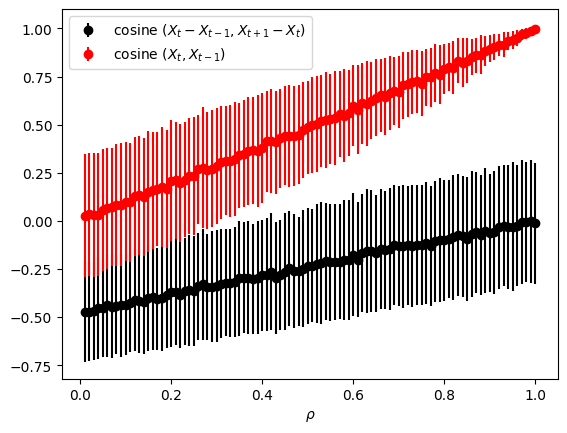

In [46]:
# cosines_means = []
# cosines_stds = []

# cosine_diffs_means = []
# cosine_diffs_stds = []

for rho in np.linspace(0.01, 1, 100):
    X_t = generate_ar1_process(n, p, rho)
    cosines = []
    cosines_diffs = []
    for i in range(X_t.shape[0] - 2):
        cosines_diffs.append(1 - cosine(X_t[i + 1] - X_t[i], X_t[i + 2] - X_t[i + 1]))
        cosines.append(1 - cosine(X_t[i], X_t[i + 1]))
    
    # cosines_means.append(np.mean(cosines))
    # cosines_stds.append(np.std(cosines))
    # cosine_diffs_means.append(np.mean(cosines_diffs))
    # cosine_diffs_stds.append(np.std(cosines_diffs))
    plt.errorbar(rho, np.mean(cosines_diffs), yerr=np.std(cosines_diffs), fmt='o', color='black')
    plt.errorbar(rho, np.mean(cosines), yerr=np.std(cosines), fmt='o', color='red')
plt.xlabel(r'$\rho$')



plt.legend(['cosine $(X_t - X_{t-1}, X_{t+1} - X_t)$', 'cosine $(X_t, X_{t-1})$'])

# breakthrough simulations

mean difference between means:  0.0028019351638547754
std difference between means:  0.31311913126606417


<Axes: >

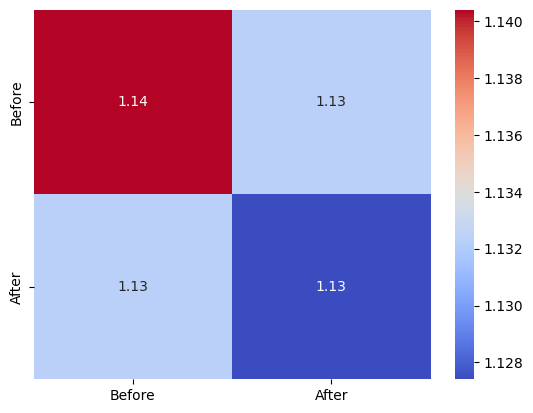

In [165]:
n_points = 20
n_sims = 1000

x_before = np.random.normal(0, 1, (n_sims, n_points))
x_after = np.random.normal(0, 1, (n_sims, n_points))


# all distances inside x_before
distances_before = []
for k in range(n_sims):
    distances = []
    for i in range(n_points):
        for j in range(i + 1, n_points):
            distances.append(np.linalg.norm(x_before[k, i] - x_before[k, j]))
    distances_before.append(np.mean(distances))


# all distances inside x_after
distances_after = []
for k in range(n_sims):
    distances = []
    for i in range(n_points):
        for j in range(i + 1, n_points):
            distances.append(np.linalg.norm(x_after[k, i] - x_after[k, j]))
    distances_after.append(np.mean(distances))

# all distances between x_before and x_after
distances_between = []
for k in range(n_sims):
    distances = []
    for i in range(n_points):
        for j in range(n_points):
            distances.append(np.linalg.norm(x_before[k, i] - x_after[k, j]))
    distances_between.append(np.mean(distances))


# smoothed distances
distances = []
for k in range(n_sims): 
    mean_before = np.mean(x_before[k])
    mean_after = np.mean(x_after[k])
    # distances.append(np.linalg.norm(mean_before - mean_after))
    distances.append(mean_before - mean_after)

print("mean difference between means: ", np.mean(distances))
print("std difference between means: ", np.std(distances))





D = np.array([[np.mean(distances_before), np.mean(distances_between)],
              [np.mean(distances_between), np.mean(distances_after)]])

sns.heatmap(D, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=["Before", "After"], yticklabels=["Before", "After"])






mean difference between means:  -1.9978443572396696
std difference between means:  0.3174591335309585


<Axes: >

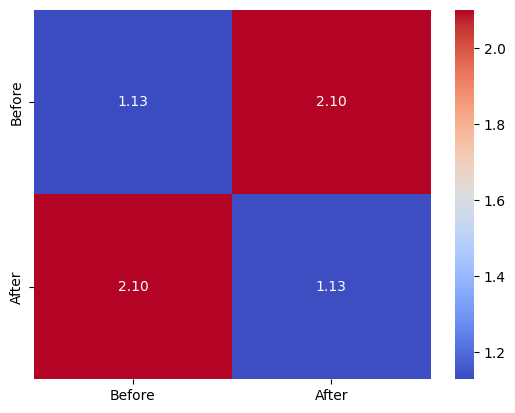

In [167]:
n_points = 20
n_sims = 1000

x_before = np.random.normal(0, 1, (n_sims, n_points))
x_after = np.random.normal(2, 1, (n_sims, n_points))


# all distances inside x_before
distances_before = []
for k in range(n_sims):
    distances = []
    for i in range(n_points):
        for j in range(i + 1, n_points):
            distances.append(np.linalg.norm(x_before[k, i] - x_before[k, j]))
    distances_before.append(np.mean(distances))


# all distances inside x_after
distances_after = []
for k in range(n_sims):
    distances = []
    for i in range(n_points):
        for j in range(i + 1, n_points):
            distances.append(np.linalg.norm(x_after[k, i] - x_after[k, j]))
    distances_after.append(np.mean(distances))

# all distances between x_before and x_after
distances_between = []
for k in range(n_sims):
    distances = []
    for i in range(n_points):
        for j in range(n_points):
            distances.append(np.linalg.norm(x_before[k, i] - x_after[k, j]))
    distances_between.append(np.mean(distances))


# smoothed distances
distances = []
for k in range(n_sims): 
    mean_before = np.mean(x_before[k])
    mean_after = np.mean(x_after[k])
    # distances.append(np.linalg.norm(mean_before - mean_after))
    distances.append(mean_before - mean_after)
    

print("mean difference between means: ", np.mean(distances))
print("std difference between means: ", np.std(distances))





D = np.array([[np.mean(distances_before), np.mean(distances_between)],
              [np.mean(distances_between), np.mean(distances_after)]])

sns.heatmap(D, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=["Before", "After"], yticklabels=["Before", "After"])






mean difference between means:  -2.0143274880893363
std difference between means:  1.1235443201739919


<Axes: >

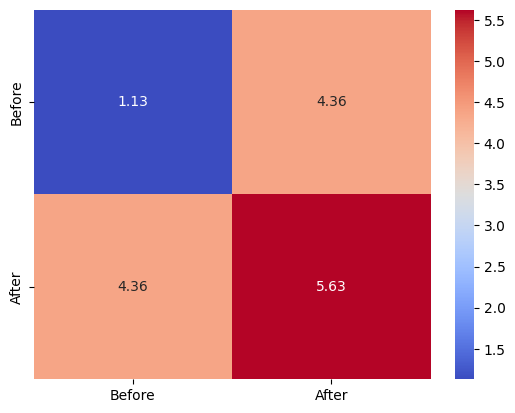

In [175]:
n_points = 20
n_sims = 1000

x_before = np.random.normal(0, 1, (n_sims, n_points))
x_after = np.random.normal(2, 5, (n_sims, n_points))


# all distances inside x_before
distances_before = []
for k in range(n_sims):
    distances = []
    for i in range(n_points):
        for j in range(i + 1, n_points):
            distances.append(np.linalg.norm(x_before[k, i] - x_before[k, j]))
    distances_before.append(np.mean(distances))


# all distances inside x_after
distances_after = []
for k in range(n_sims):
    distances = []
    for i in range(n_points):
        for j in range(i + 1, n_points):
            distances.append(np.linalg.norm(x_after[k, i] - x_after[k, j]))
    distances_after.append(np.mean(distances))

# all distances between x_before and x_after
distances_between = []
for k in range(n_sims):
    distances = []
    for i in range(n_points):
        for j in range(n_points):
            distances.append(np.linalg.norm(x_before[k, i] - x_after[k, j]))
    distances_between.append(np.mean(distances))

# smoothed distances
distances = []
for k in range(n_sims): 
    mean_before = np.mean(x_before[k])
    mean_after = np.mean(x_after[k])
    # distances.append(np.linalg.norm(mean_before - mean_after))
    distances.append(mean_before - mean_after)

print("mean difference between means: ", np.mean(distances))
print("std difference between means: ", np.std(distances))




D = np.array([[np.mean(distances_before), np.mean(distances_between)],
              [np.mean(distances_between), np.mean(distances_after)]])

sns.heatmap(D, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=["Before", "After"], yticklabels=["Before", "After"])





mean difference between means:  -0.02065708196700577
std difference between means:  1.111087065446066


<Axes: >

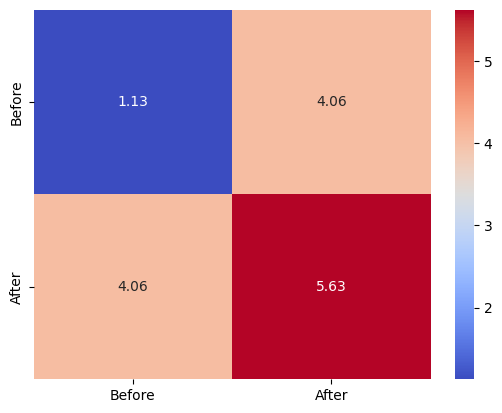

In [172]:
n_points = 20
n_sims = 1000

x_before = np.random.normal(0, 1, (n_sims, n_points))
x_after = np.random.normal(0, 5, (n_sims, n_points))


# all distances inside x_before
distances_before = []
for k in range(n_sims):
    distances = []
    for i in range(n_points):
        for j in range(i + 1, n_points):
            distances.append(np.linalg.norm(x_before[k, i] - x_before[k, j]))
    distances_before.append(np.mean(distances))


# all distances inside x_after
distances_after = []
for k in range(n_sims):
    distances = []
    for i in range(n_points):
        for j in range(i + 1, n_points):
            distances.append(np.linalg.norm(x_after[k, i] - x_after[k, j]))
    distances_after.append(np.mean(distances))

# all distances between x_before and x_after
distances_between = []
for k in range(n_sims):
    distances = []
    for i in range(n_points):
        for j in range(n_points):
            distances.append(np.linalg.norm(x_before[k, i] - x_after[k, j]))
    distances_between.append(np.mean(distances))


# smoothed distances
distances = []
for k in range(n_sims): 
    mean_before = np.mean(x_before[k])
    mean_after = np.mean(x_after[k])
    # distances.append(np.linalg.norm(mean_before - mean_after))
    distances.append(mean_before - mean_after)

print("mean difference between means: ", np.mean(distances))
print("std difference between means: ", np.std(distances))




D = np.array([[np.mean(distances_before), np.mean(distances_between)],
              [np.mean(distances_between), np.mean(distances_after)]])

sns.heatmap(D, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=["Before", "After"], yticklabels=["Before", "After"])





# adding number of points increases confidence in comparing the means